In [18]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence


from textwrap import wrap

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()

'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [3]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')

In [4]:
varkey = pd.read_csv('../data/output/QuestionPro_varkey.csv')
varkey.index = varkey.agg('{0[var]}_{0[val]}'.format, axis=1)


varkey.Q = varkey.Q.str.replace('Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. ',
                     '')
varkey.Q = varkey.Q.str.replace('On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, p',
                     'P')
varkey.Q = varkey.Q.str.replace(' \(0-10\) \[ , \]', '')
varkey.Q = varkey.Q.str.replace('Please provide approximate percentage\(s\) for each of the development platforms listed below. ', 'Dev platform %: ')
varkey.Q = varkey.Q.str.replace('Please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. ', 'Information channel importance: ')
varkey.Q = varkey.Q.str.replace('Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. ', 'Purchase driver: ')
varkey.Q = varkey.Q.str.replace('From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. ',
                               'Top 3 reasons alternatives: ')
varkey.Q = varkey.Q.str.replace('Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?',
                               'Awareness to purchase duration: ')
varkey.Q = varkey.Q.str.replace('Which platform does your organization primarily develop for?',
                               'Primary platform dev:')
varkey.Q = varkey.Q.str.replace('Do you outsource a significant portion of your organization’s application development function?',
                               'Outsource: ')
varkey.Q = varkey.Q.str.replace('Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription?',
                               'Purchase role', regex=True)
varkey.Q = varkey.Q.str.replace('How many Java applications does your organization plan to build or deploy in 2020?',
                               'Num Java apps build/deploy 2020: ')
varkey.Q = varkey.Q.str.replace('How long has your organization been using Oracle Java SE Subscription for managing your Java applications?',
                               'Subscription duration:')
varkey.Q = varkey.Q.str.replace('What is the approximate annual revenue of your company?',
                               'Company revenue: ')
varkey.Q = varkey.Q.str.replace('Which one of the below best describes your company’s industry grouping?',
                               'Industry grouping')
varkey.Q = varkey.Q.str.replace('What is your job title?',
                               'Job title')
varkey.Q = varkey.Q.str.replace(' \(e.g. Twitter, LinkedIn, Facebook, etc.\)',
                               '')
# varkey.Q = varkey.Q.str.replace('',
#                                )

varkey.Q.drop_duplicates()

Job_Title_1                                                                                                                                                                                                                                                                                                                                                                         Job title?
Company_Industry_1                                                                                                                                                                                                                                                                                                                                                          Industry grouping?
Company_Revenue_1                                                                                                                                                                                                                         

In [5]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC', # tools
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest', # elements
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods', #atributes
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [6]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [7]:
%run -i 'functions.py'

# Weighted

In [8]:
modw_df = mod_df.copy()

In [9]:
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [10]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

# Describe Sentiment Metric

In [11]:
y23w_var = modw_df[y2w_list + y3w_list].mean(axis=1,skipna=True)
modw_df['y23w_var'] = y23w_var

In [12]:
df1 = y23w_var.describe(include='all')

df1.loc['dtype'] = y23w_var.dtypes
df1.loc['size'] = len(y23w_var)
df1.loc['% count'] = y23w_var.isnull().mean()

print (df1)

count            219
mean         52.3912
std          20.8057
min                0
25%          37.3125
50%           52.625
75%          66.2562
max              100
dtype        float64
size             228
% count    0.0394737
dtype: object


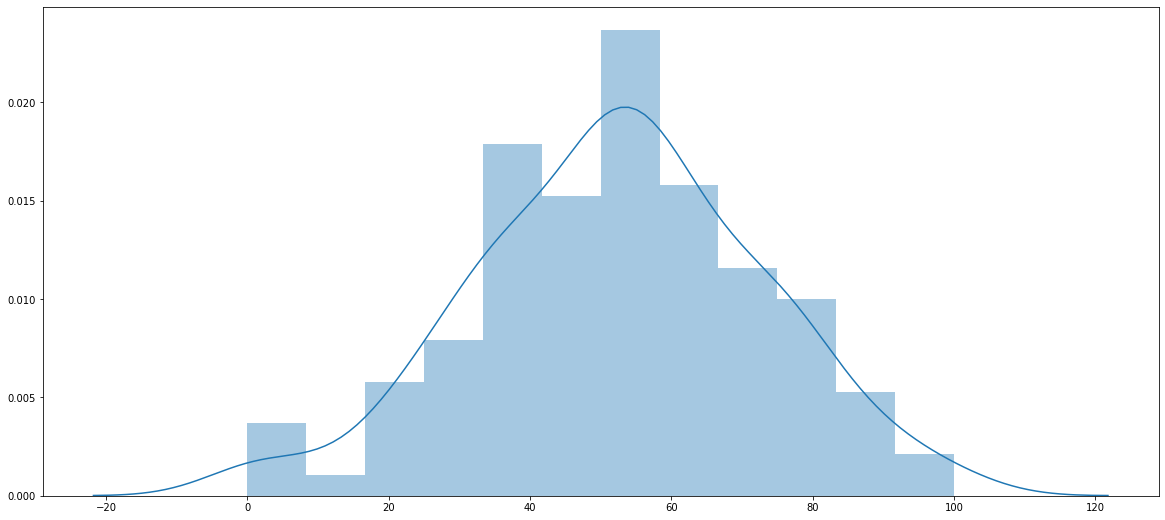

In [13]:
sns.distplot(y23w_var.fillna(y23w_var.mean()))

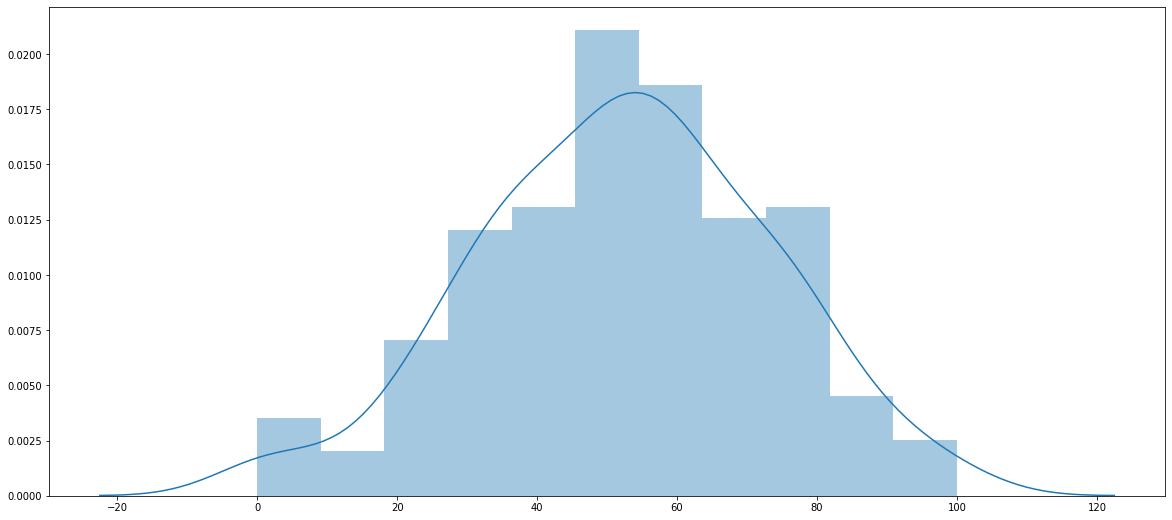

In [14]:
sns.distplot(y23w_var.dropna())

# y23w w/ Continuous Variables

In [64]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=3

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = cont_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y23w


In [65]:
accuracy

73.75930063880406

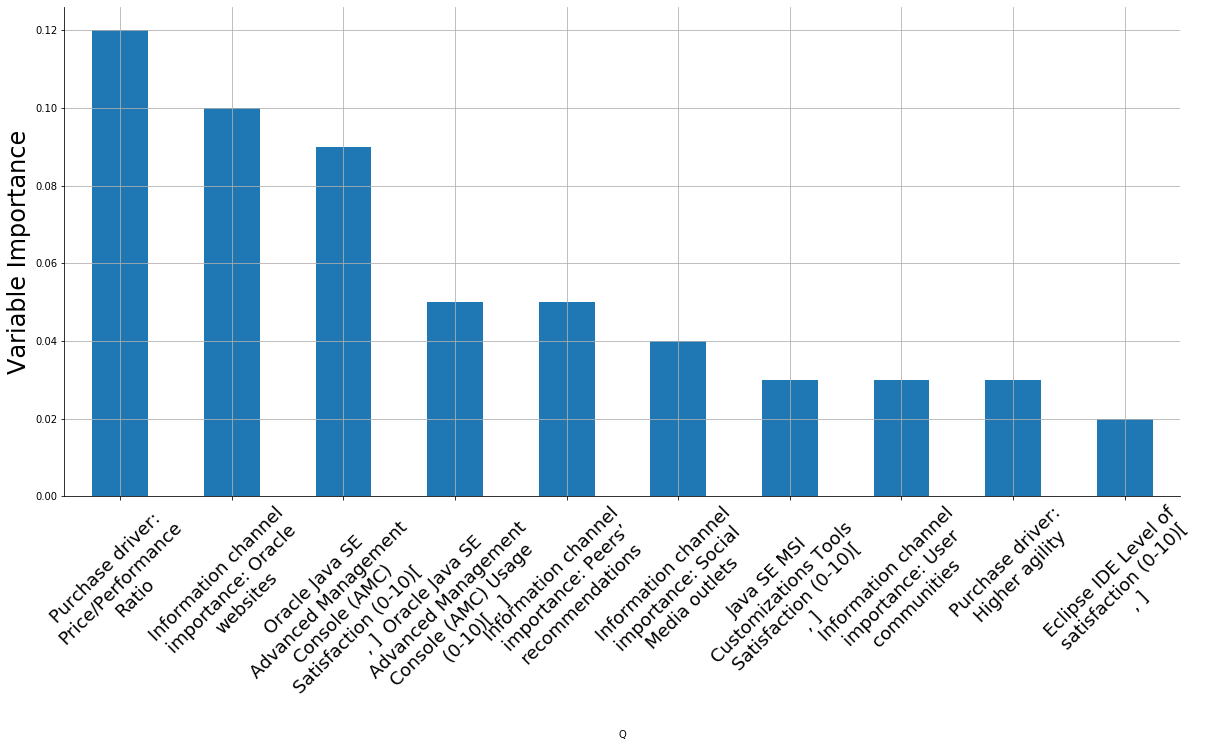

In [67]:
varimp_df = pd.DataFrame(feature_importances)

varimp_df.columns = ['var','imp']
varimp_df = varimp_df.merge(varkey, how='left')
varimp_df = varimp_df[['var','Q','imp']]

temp = varimp_df[['Q','imp']][0:10]

temp.Q = ['\n'.join(wrap(q, 20)) for q in temp.Q]
varimp_top10 = temp.Q.values[0:10]

fig = temp.plot.bar(x='Q', y='imp', rot=45)
fig.set_ylabel("Variable Importance", fontsize=24)
fig.xaxis.set_tick_params(labelsize=18)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.get_legend().remove()
fig.grid()

In [68]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y2_list + y3_list +x2_list + x3_list,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [31]:
colnames = pd.DataFrame(X_train.columns)
colnames.columns = ['var']
colnames = colnames.merge(varkey, how='left', on='var')#.Q.values
colnames.Q = colnames.Q.fillna(colnames['var'])
X_train.columns = colnames.Q.values
X_train.columns = ['\n'.join(wrap(q, 20)) for q in X_train.columns]

In [32]:
varimp_top10

array(['Purchase driver:\nPrice/Performance\nRatio',
       'Information channel\nimportance: Oracle\nwebsites',
       'Oracle Java SE\nAdvanced Management\nConsole (AMC)\nSatisfaction (0-10)[\n, ]',
       'Oracle Java SE\nAdvanced Management\nConsole (AMC) Usage\n(0-10)[ , ]',
       'Information channel\nimportance: Peers’\nrecommendations',
       'Information channel\nimportance: Social\nMedia outlets',
       'Java SE MSI\nCustomizations Tools\nSatisfaction (0-10)[\n, ]',
       'Information channel\nimportance: User\ncommunities',
       'Purchase driver:\nHigher agility',
       'Eclipse IDE Level of\nsatisfaction (0-10)[\n, ]'], dtype=object)

In [33]:
tuple(varimp_top10[0:2])

('Purchase driver:\nPrice/Performance\nRatio',
 'Information channel\nimportance: Oracle\nwebsites')

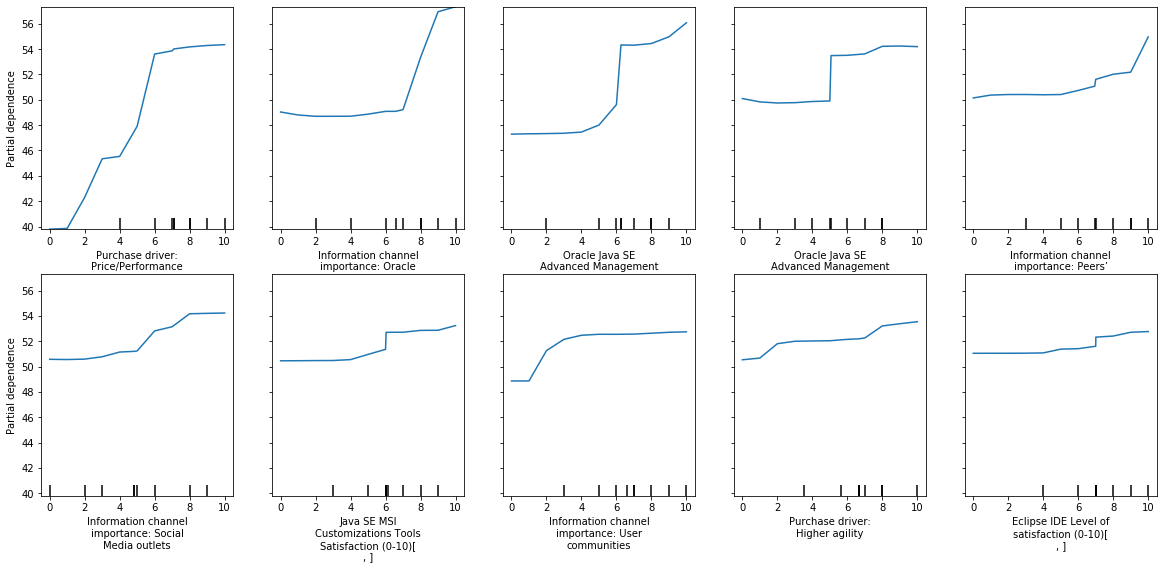

In [34]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

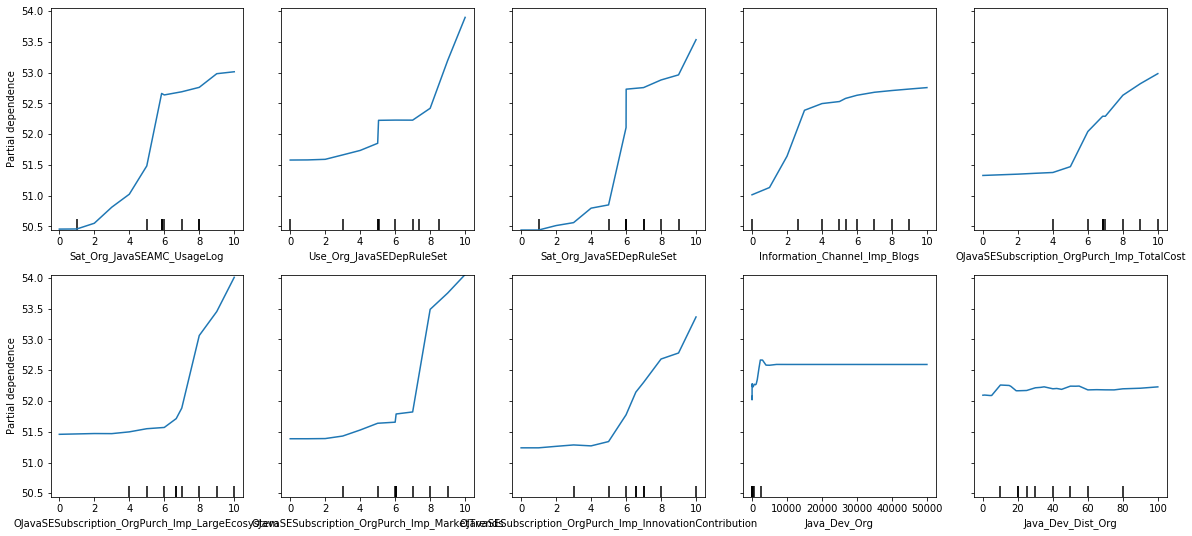

In [69]:
fig = plot_partial_dependence(clf, X_train, 
                              features=[x[0] for x in feature_importances][10:20], 
                        n_cols=5, grid_resolution=100)

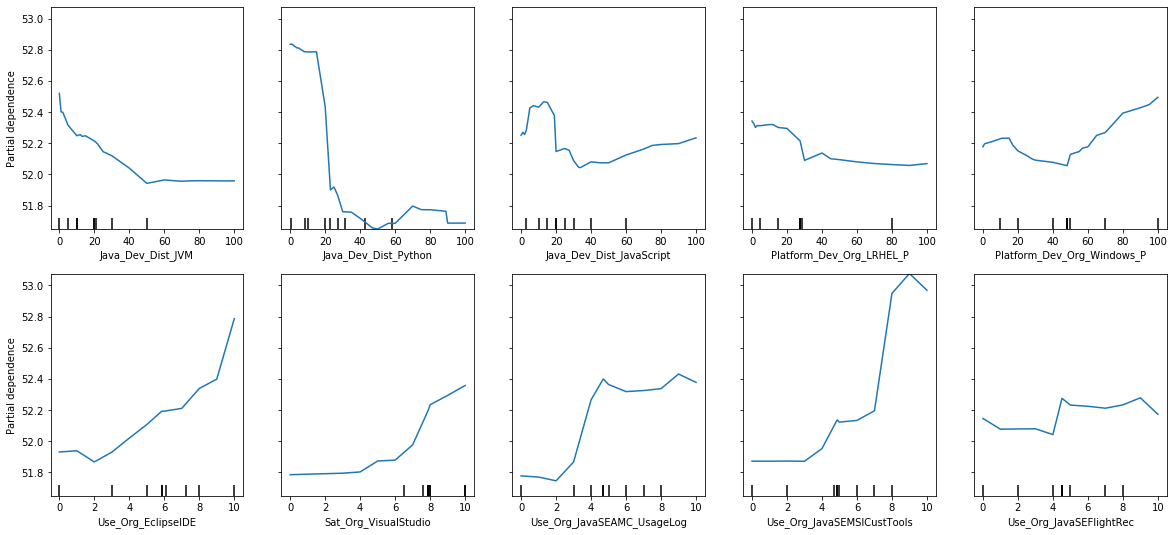

In [70]:
fig = plot_partial_dependence(clf, X_train, 
                              features=[x[0] for x in feature_importances][20:30], 
                        n_cols=5, grid_resolution=100)

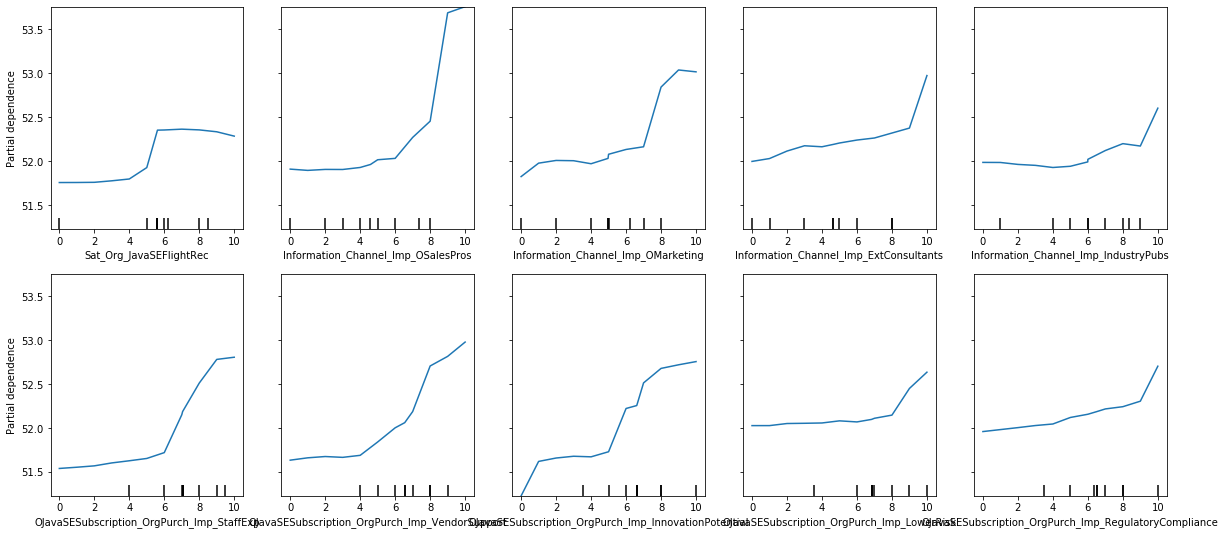

In [72]:
fig = plot_partial_dependence(clf, X_train, 
                              features=[x[0] for x in feature_importances][30:40], 
                        n_cols=5, grid_resolution=100)

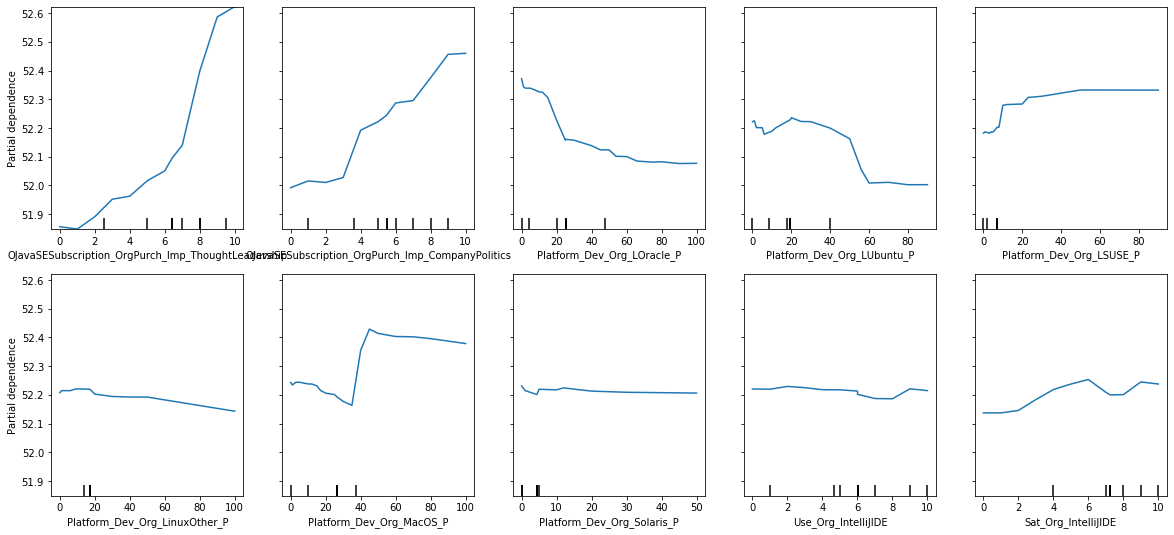

In [73]:
fig = plot_partial_dependence(clf, X_train, 
                              features=[x[0] for x in feature_importances][40:50], 
                        n_cols=5, grid_resolution=100)

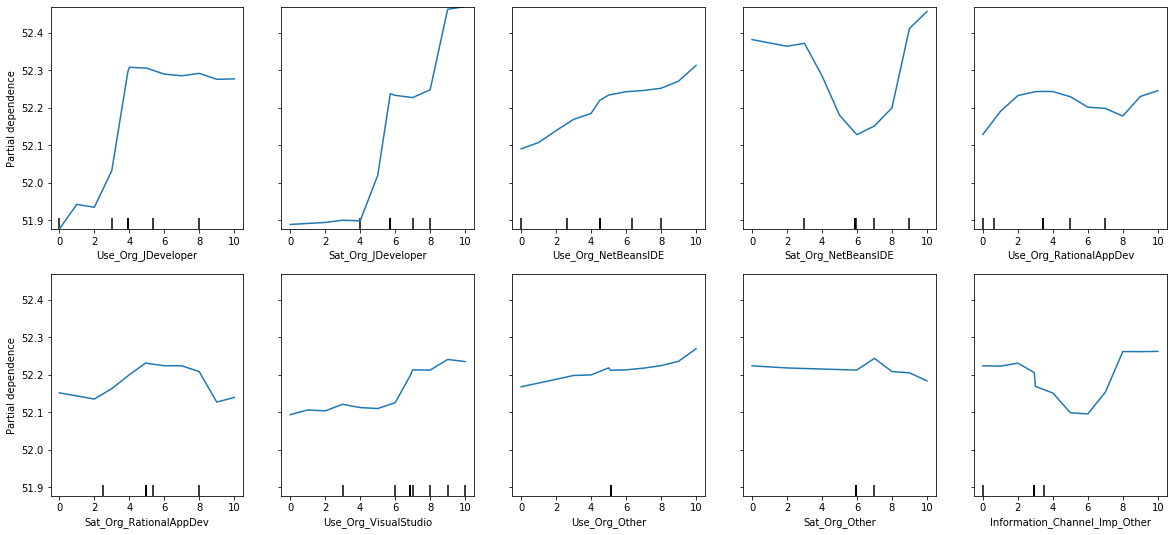

In [74]:
fig = plot_partial_dependence(clf, X_train, 
                              features=[x[0] for x in feature_importances][50:60], 
                        n_cols=5, grid_resolution=100)

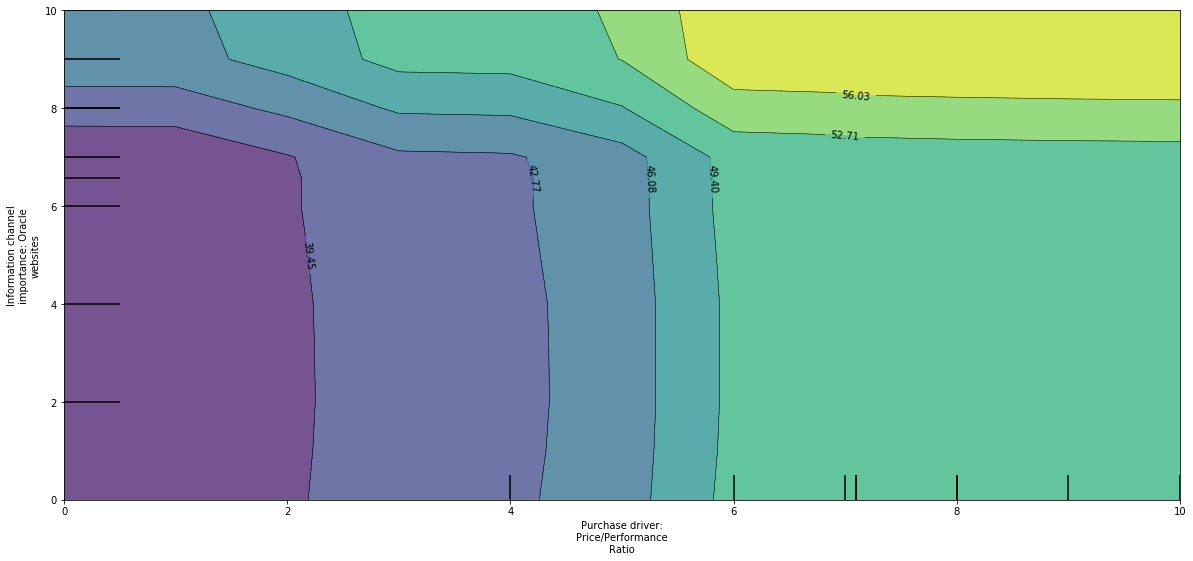

In [25]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])], 
                        n_cols=5, grid_resolution=100)

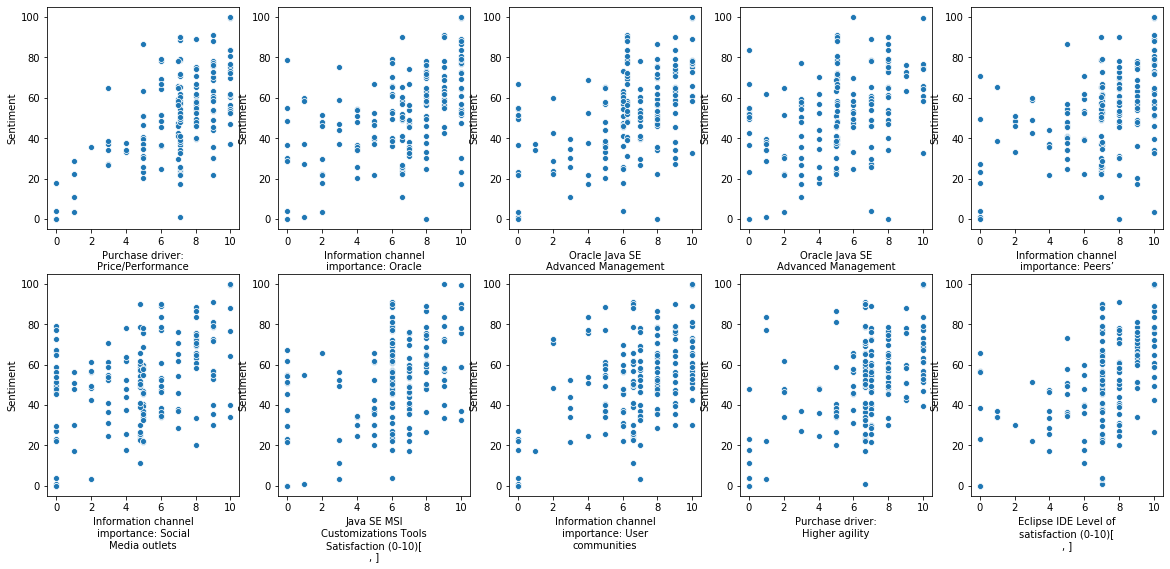

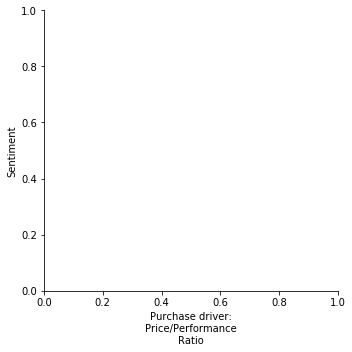

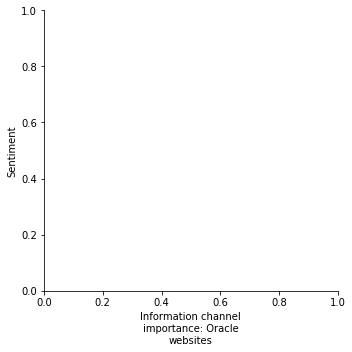

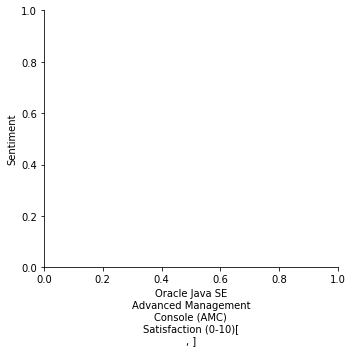

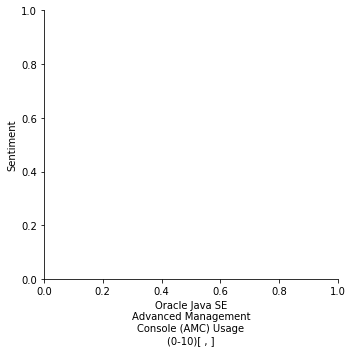

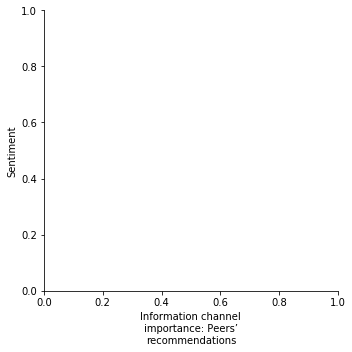

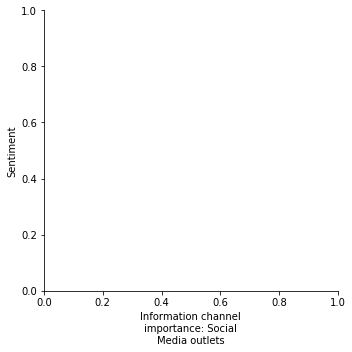

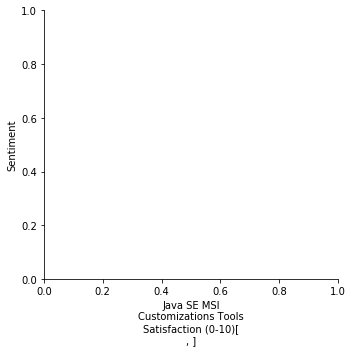

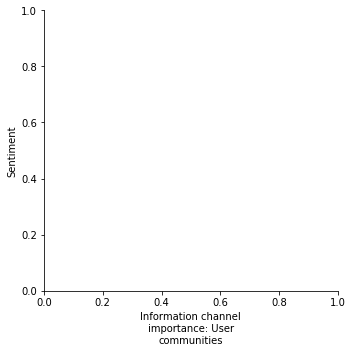

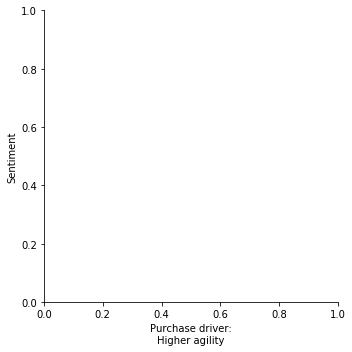

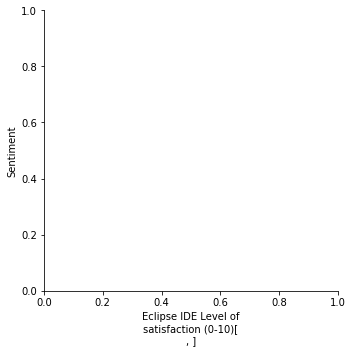

In [35]:
X_train['Sentiment'] = modw_df.y23w_var

fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    fig=sns.relplot(x=v, y="Sentiment", data=X_train, ax=axli[i])
    i=i+1

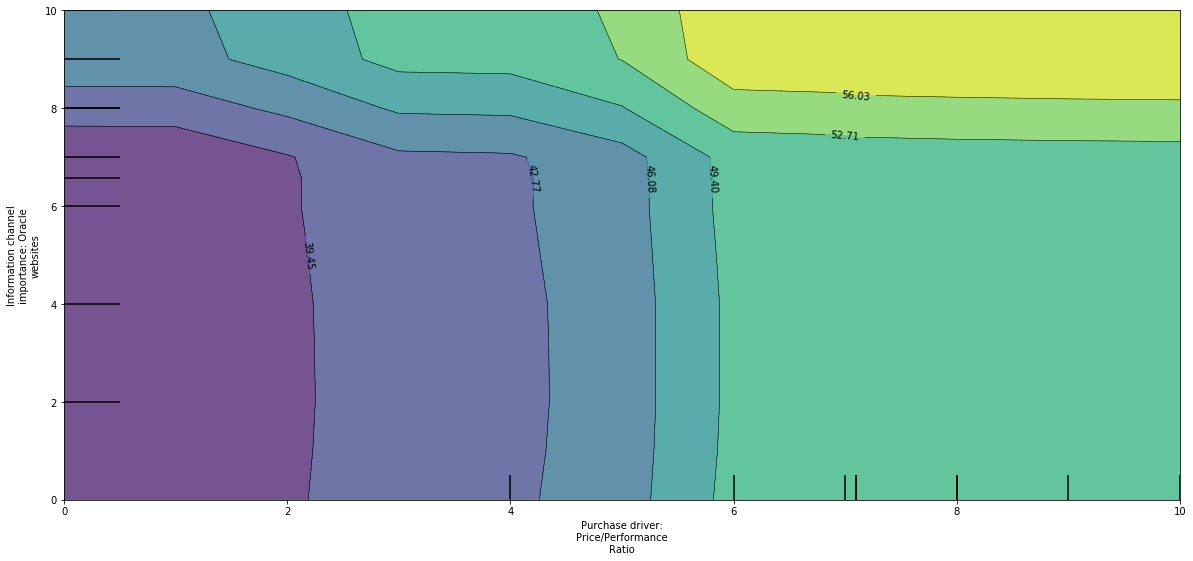

In [29]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [34]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['OJavaSESubscription_OrgPurch_Imp_PrPerRatio'
 'Information_Channel_Imp_OWebsites' 'Sat_Org_JavaSEAMC'
 'Use_Org_JavaSEAMC' 'Information_Channel_Imp_PeerRec'
 'Information_Channel_Imp_SocialMedia' 'Sat_Org_JavaSEMSICustTools'
 'Information_Channel_Imp_UserComm'
 'OJavaSESubscription_OrgPurch_Imp_HigherAgility' 'Sat_Org_EclipseIDE']


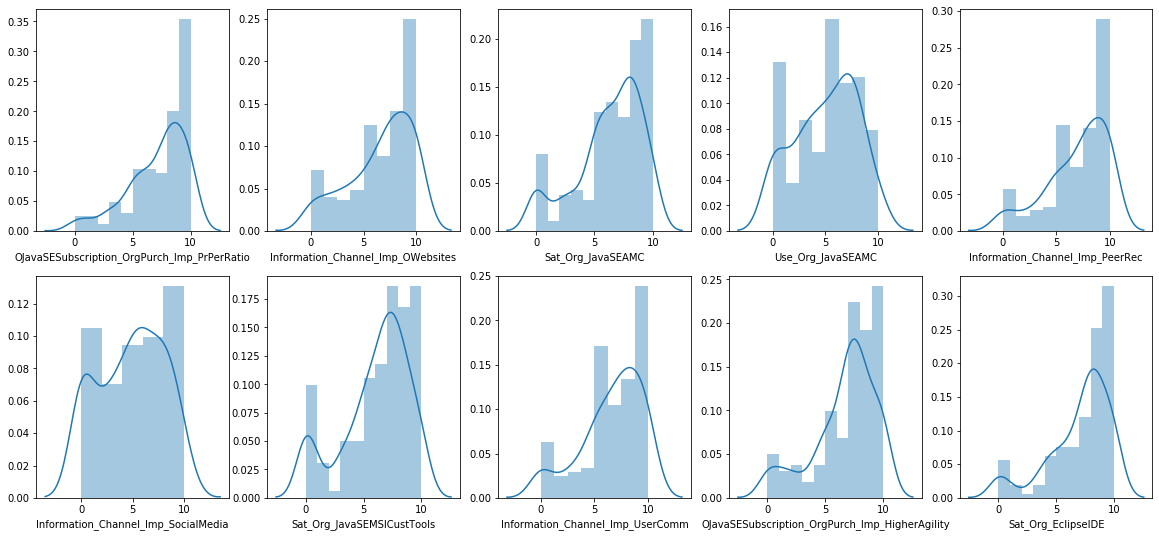

In [35]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.distplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

# y23w w/ Categ Variables

In [46]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=3

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = catg_dummy_list+ dummy0_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y23w


In [47]:
accuracy

57.806235094520375

In [48]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]

In [49]:
varimp_top10 = ['Country_Code_CA',
 'Company_Industry_20',
 'OJavaSESubscription_Alts_Top3_AppSecurity',
 'OJavaSESubscription_Alts_Top3_Familiarity',
 'OracleJavaSESubscription_Ind_Role_3',
 'OracleJavaSESubscription_Ind_Role_2',
 'OracleJavaSESubscription_Ind_Role_1',
 'Java_App_Org_Deploy_2020_4',
 'Java_App_Org_Deploy_2020_3',
 'Job_Title_3']

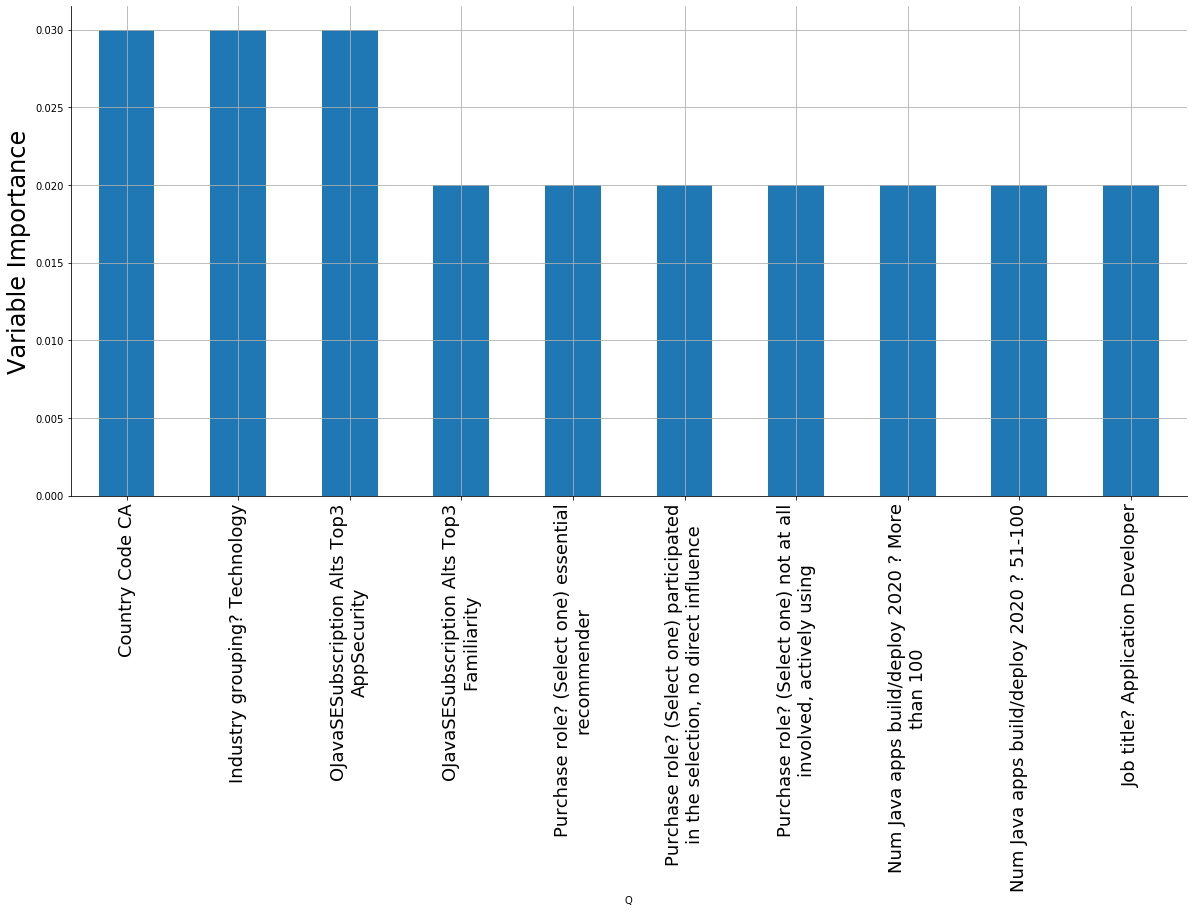

In [60]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
# varimp_top10 = varimp_df[0].values[0:10]
# print(varimp_top10)

varimp_df = pd.DataFrame(feature_importances)

varimp_df.columns = ['var','imp']
varimp_df = varimp_df.merge(varkey, left_on='var', right_index=True,how='left')
varimp_df.Q = varimp_df.Q.fillna(varimp_df.var_x)
varimp_df.Q = varimp_df.Q.str.replace(':?','').str.replace(': ?','')#.str.replace(' ?','?')
varimp_df['QA'] = varimp_df.Q+" "+varimp_df.A_short.fillna(varimp_df.A)
varimp_df['QA'] = varimp_df['QA'].fillna(varimp_df.var_x)
varimp_df['QA'] = varimp_df['QA'].str.replace('_',' ')
varimp_df = varimp_df[['var_x','QA','imp']]
varimp_df.columns = ['var','Q','imp']

temp = varimp_df[['var','Q','imp']][varimp_df['var'].isin(varimp_top10)]

temp['var'] = temp['var'].astype("category")
temp['var'].cat.set_categories(varimp_top10, inplace=True)
temp = temp.sort_values(["var"])


temp.Q = ['\n'.join(wrap(q, 40)) for q in temp.Q]
# varimp_top10 = temp.Q.values[0:10]

fig = temp.plot.bar(x='Q', y='imp', rot=90)
fig.set_ylabel("Variable Importance", fontsize=24)
fig.xaxis.set_tick_params(labelsize=18)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.get_legend().remove()
fig.grid()

In [61]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y1_list + y2_list + y3_list + x1_list + x2_list + x3_list,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [75]:
varimp_top10 = varimp_df.sort_values('imp',ascending=False)[['var']][0:10]['var'].tolist()

In [76]:
varimp_top10

['Country_Code_CA',
 'Company_Industry_20',
 'OJavaSESubscription_Alts_Top3_AppSecurity',
 'OJavaSESubscription_Alts_Top3_Familiarity',
 'OracleJavaSESubscription_Ind_Role_3',
 'OracleJavaSESubscription_Ind_Role_2',
 'OracleJavaSESubscription_Ind_Role_1',
 'Java_App_Org_Deploy_2020_4',
 'Java_App_Org_Deploy_2020_3',
 'Job_Title_3']

In [77]:
tuple(varimp_top10[0:2])

('Country_Code_CA', 'Company_Industry_20')

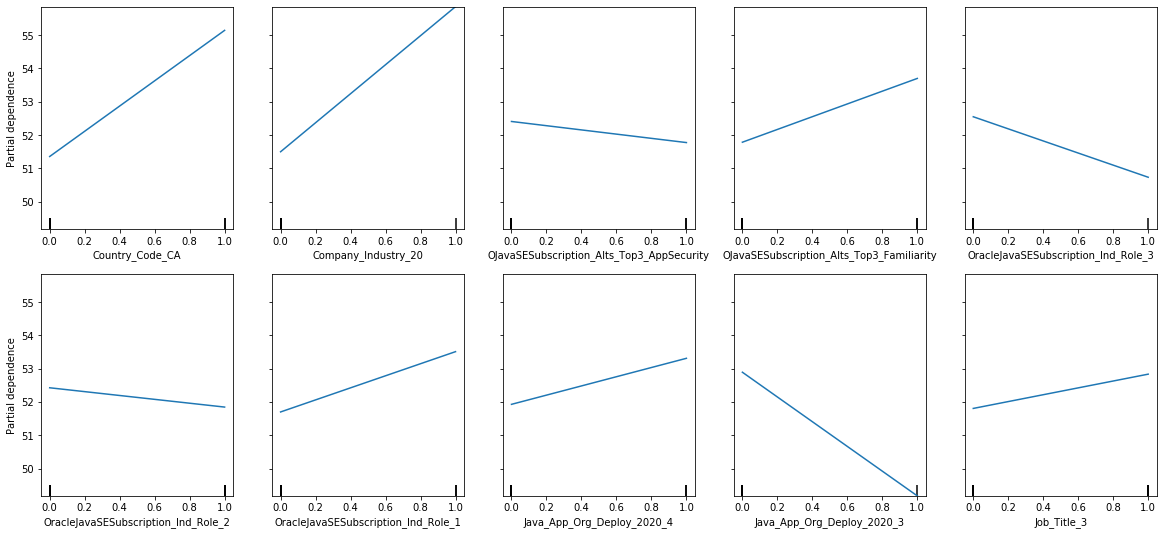

In [78]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

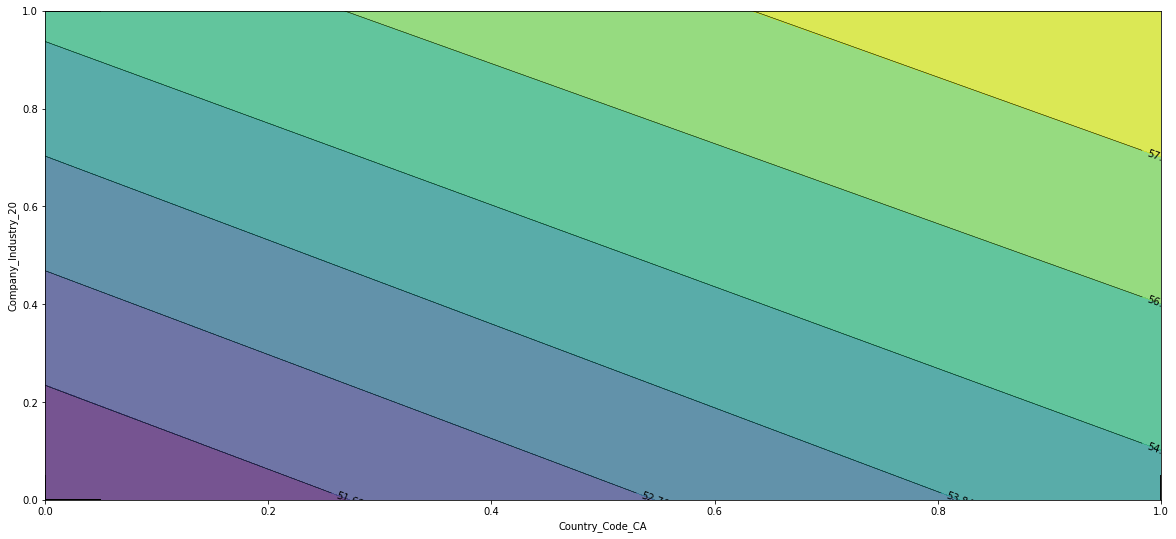

In [79]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [80]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['Country_Code_CA', 'Company_Industry_20', 'OJavaSESubscription_Alts_Top3_AppSecurity', 'OJavaSESubscription_Alts_Top3_Familiarity', 'OracleJavaSESubscription_Ind_Role_3', 'OracleJavaSESubscription_Ind_Role_2', 'OracleJavaSESubscription_Ind_Role_1', 'Java_App_Org_Deploy_2020_4', 'Java_App_Org_Deploy_2020_3', 'Job_Title_3']


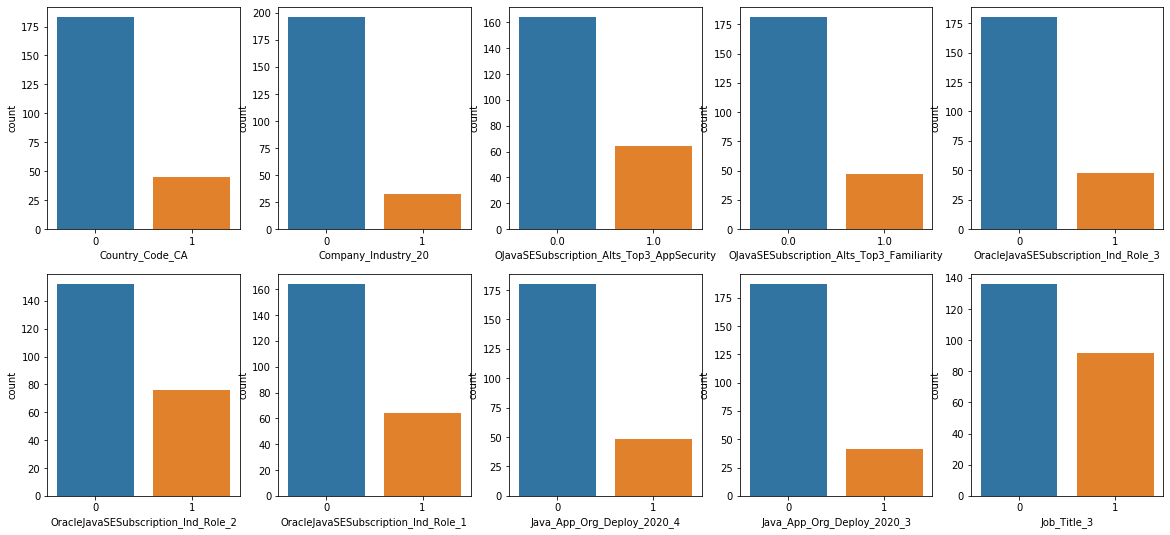

In [81]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.countplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

In [82]:
mod_df['Country_Code_CA'].groupby(mod_df['Country_Code_CA']).count()

Country_Code_CA
0    183
1     45
Name: Country_Code_CA, dtype: int64

In [83]:
mod_df['Company_Industry_20'].groupby(mod_df['Company_Industry_20']).count()

Company_Industry_20
0    196
1     32
Name: Company_Industry_20, dtype: int64

In [86]:
varimp_top10

['Country_Code_CA',
 'Company_Industry_20',
 'OJavaSESubscription_Alts_Top3_AppSecurity',
 'OJavaSESubscription_Alts_Top3_Familiarity',
 'OracleJavaSESubscription_Ind_Role_3',
 'OracleJavaSESubscription_Ind_Role_2',
 'OracleJavaSESubscription_Ind_Role_1',
 'Java_App_Org_Deploy_2020_4',
 'Java_App_Org_Deploy_2020_3',
 'Job_Title_3']

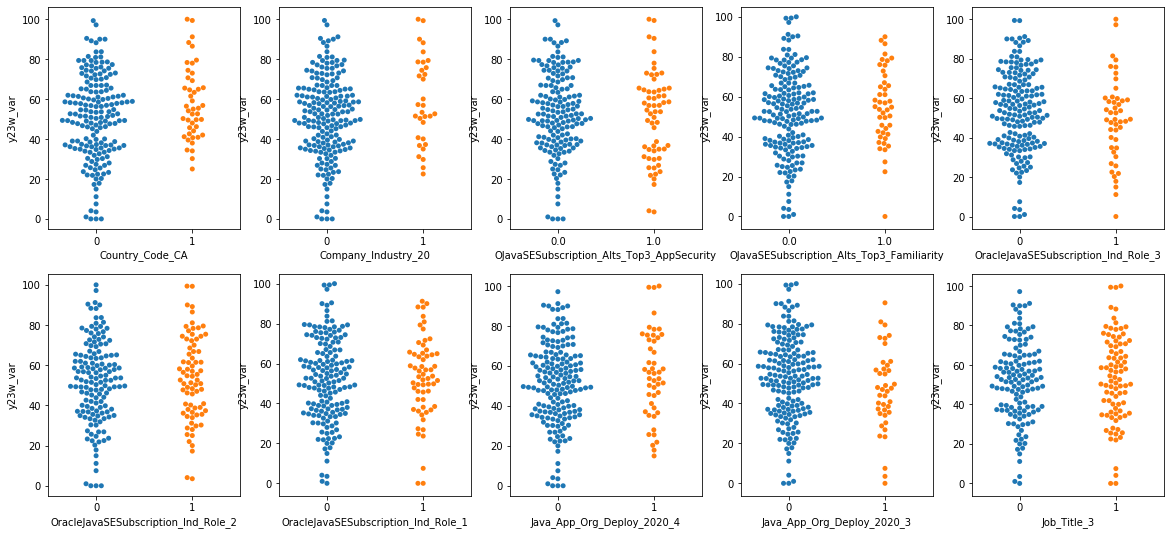

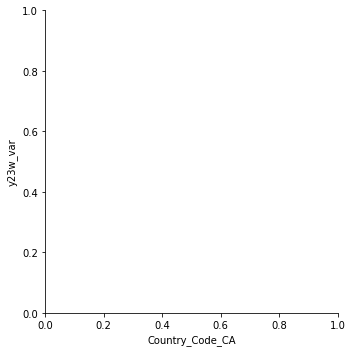

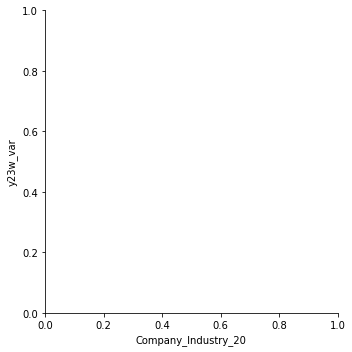

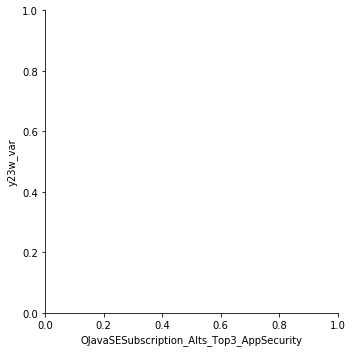

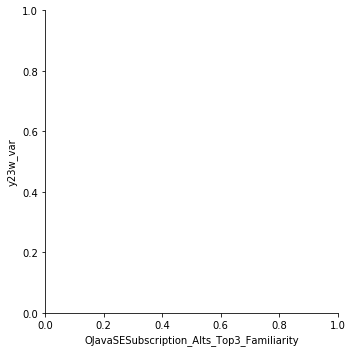

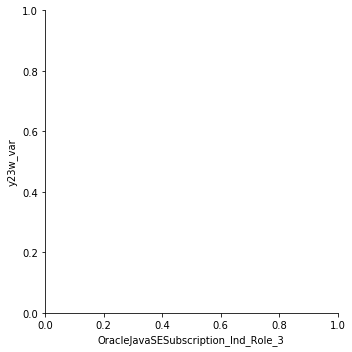

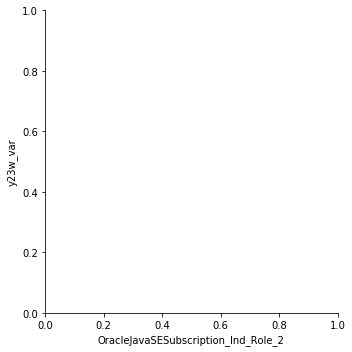

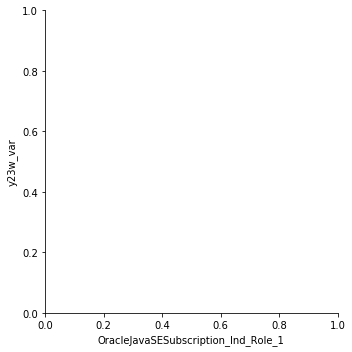

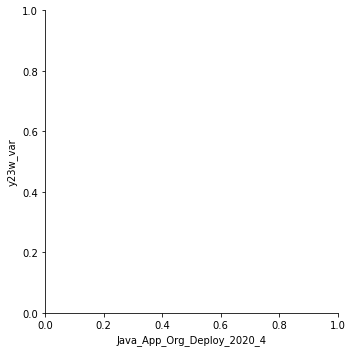

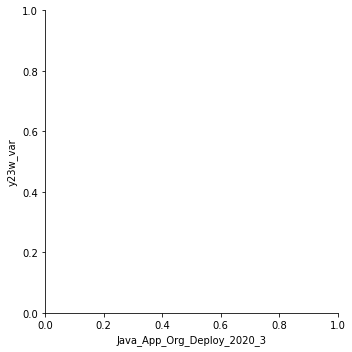

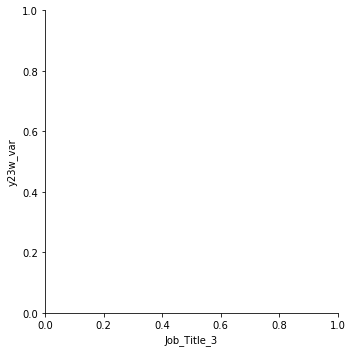

In [87]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.catplot(x=v, y="y23w_var", kind="swarm", 
                data=modw_df, ax=axli[i])
    i=i+1


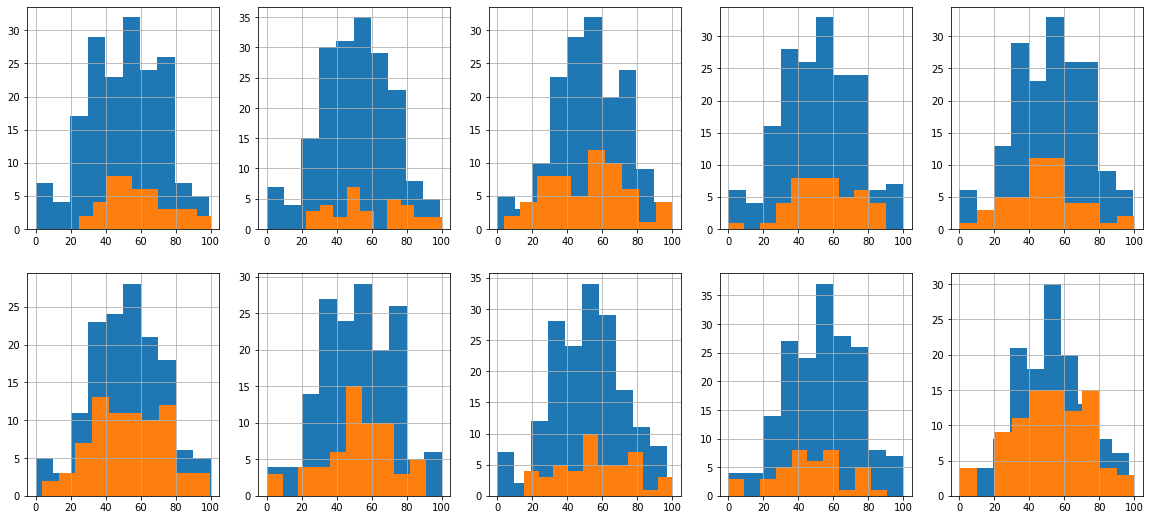

In [85]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    modw_df.groupby(v)['y23w_var'].hist(ax=axli[i])
    i=i+1
